<a href="https://colab.research.google.com/github/bidya01/Data-Science-Projects---The-Sparks-Foundation/blob/main/UnsupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation - Graduate Rotational Internship Program (GRIP) April'21**

# **Task 2 : Prediction Using Unsupervised ML**




Description : Prediction of optimum number of clusters from the given "iris" dataset     
Dataset : ' https://bit.ly/3kXTdox '   
Language Used : Python     
Author : Bidya Dasgupta

In [1]:
#Importing all required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

The Iris dataset is read using read_csv Pandas method and the data is stored in a data frame df. head() method is used on the dataset to see its first 10 records.

In [2]:
#Loading the required iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


All four features of the dataset (sepal length, sepal width, petal length and petal width) are selected in a variable called x so that the model can be trained with these features. iloc function is used on df and the column index (0,1,2,3) are used for the four columns.

In [3]:
x = iris_df.iloc[:,[0, 1, 2, 3]].values

The next step is to find the optimum number of cluster for KMeans and to detmine the value of k.

In [4]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',
                  max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

The results are plotted onto a graph to observe the shape of the graph.

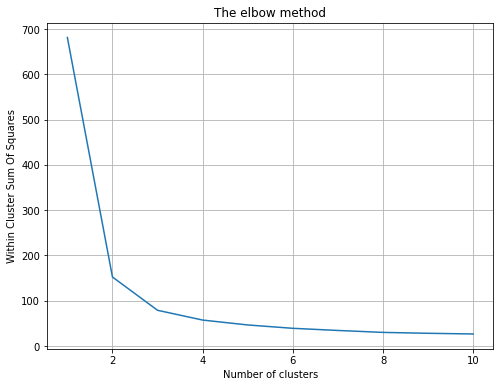

In [29]:
plt.plot(range(1,11),wcss)
plt.title("The elbow method")
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum Of Squares')
plt.grid(True)
plt.rcParams["figure.figsize"] = (8, 6)
plt.show()

**Observation** : An elbow shaped plot is obtained. Thus it is clearly evident why it is called 'The elbow method'. The elbow occurs at the optimum clusters. This is when the within cluster sum of squares(WCSS) doesn't decrease significantly with every iteration. From the above plot, the number of clusters or the value of k is chosen as **3** .

# **Creating the k-means Classifier**

In [7]:
#Applying kmeans to the classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# **Visualising the clusters**

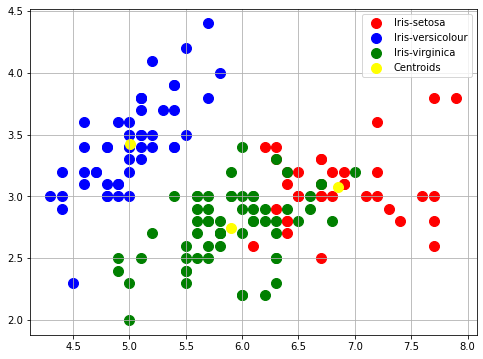

In [31]:
#Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Centroids')
plt.grid(True)
plt.rcParams["figure.figsize"] = (8,6)
plt.legend()

This concludes the k-means clustering.